In [21]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
import cv2

In [ ]:
!unzip "/content/drive/MyDrive/Person Detection/combined_dataset.zip"  -d "/content/Person Detection"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Person Detection/combined_dataset/valid/000000038048.jpg  
  inflating: /content/Person Detection/combined_dataset/valid/000000038048.txt  
  inflating: /content/Person Detection/combined_dataset/valid/000000038118.jpg  
  inflating: /content/Person Detection/combined_dataset/valid/000000038118.txt  
  inflating: /content/Person Detection/combined_dataset/valid/000000038210.jpg  
  inflating: /content/Person Detection/combined_dataset/valid/000000038210.txt  
  inflating: /content/Person Detection/combined_dataset/valid/000000038678.jpg  
  inflating: /content/Person Detection/combined_dataset/valid/000000038678.txt  
  inflating: /content/Person Detection/combined_dataset/valid/000000038829.jpg  
  inflating: /content/Person Detection/combined_dataset/valid/000000038829.txt  
  inflating: /content/Person Detection/combined_dataset/valid/000000039405.jpg  
  inflating: /content/Person Detection/combined_dataset/va

In [ ]:
# Specifying the paths to the train and valid set
train_set = "/content/Person Detection/combined_dataset/train"
valid_set = "/content/Person Detection/combined_dataset/valid"

In [ ]:
Count_train_set = len(os.listdir(train_set))
print(Count_train_set)


2000430


In [ ]:
Count_valid_set = len(os.listdir(valid_set))
print(Count_valid_set)

5386


In [22]:
import random
class DataGenerator2:
    def __init__(self, directory, batch_size=32):
        self.directory2 = directory
        self.batch_size2 = batch_size
        self.file_list2 = [filename for filename in os.listdir(directory) if filename.endswith('.jpg')]
        random.shuffle(self.file_list2)
        self.current_idx2 = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_idx2 >= len(self.file_list2):
            raise StopIteration
        batch_files2 = self.file_list2[self.current_idx2:self.current_idx2 + self.batch_size2]
        images2, bboxes_list2 = [], []
        for filename2 in batch_files2:
            image_path2 = os.path.join(self.directory2, filename2)
            image2 = cv2.imread(image_path2)
            images2.append(image2)

            bounding_boxes2 = read_bounding_boxes_from_labels2(image_path2)
            bboxes_list2.append(bounding_boxes2)

        self.current_idx2 += self.batch_size2
        return images2, bboxes_list2

In [23]:
def read_bounding_boxes_from_labels2(image_path2):
    label_path2 = image_path2.replace('.jpg', '.txt')
    bounding_boxes2 = []

    if os.path.exists(label_path2):
        with open(label_path2, 'r') as file2:
            lines2 = file2.readlines()

            for line2 in lines2:
                class_id2, x2, y2, w2, h2 = map(float, line2.strip().split())
                image2 = cv2.imread(image_path2)
                image_height2, image_width2, _ = image2.shape
                absolute_x2 = int((x2 - w2 / 2) * image_width2)
                absolute_y2 = int((y2 - h2 / 2) * image_height2)
                absolute_w2 = int(w2 * image_width2)
                absolute_h2 = int(h2 * image_height2)
                bounding_boxes2.append([absolute_x2, absolute_y2, absolute_w2, absolute_h2])

    return bounding_boxes2

In [24]:
def draw_bounding_boxes2(image2, bounding_boxes2):
    for bbox2 in bounding_boxes2:
        x2, y2, w2, h2 = bbox2
        color2 = (0, 0, 255)  # Red color
        cv2.rectangle(image2, (x2, y2), (x2 + w2, y2 + h2), color2, 3)
        tag2 = "person"
        text_size2, _ = cv2.getTextSize(tag2, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
        cv2.rectangle(image2, (x2, y2 - text_size2[1] - 10), (x2 + text_size2[0], y2), (255, 255, 255), -1)
        cv2.putText(image2, tag2, (x2, y2 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

    return image2

In [25]:
def visualize_batch2(images2, bboxes_list2, ncols=4):
    nrows = (len(images2) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
    for i2, (image2, bboxes2) in enumerate(zip(images2, bboxes_list2)):
        if nrows == 1:
            ax2 = axs[i2 % ncols]
        else:
            ax2 = axs[i2 // ncols, i2 % ncols]

        if image2 is not None:
            image_with_boxes2 = draw_bounding_boxes2(image2.copy(), bboxes2)
            ax2.imshow(cv2.cvtColor(image_with_boxes2, cv2.COLOR_BGR2RGB))
            ax2.axis('off')
        else:
            print(f"Error loading image at index {i2}.")

    plt.show()

Error: 'NoneType' object has no attribute 'shape'


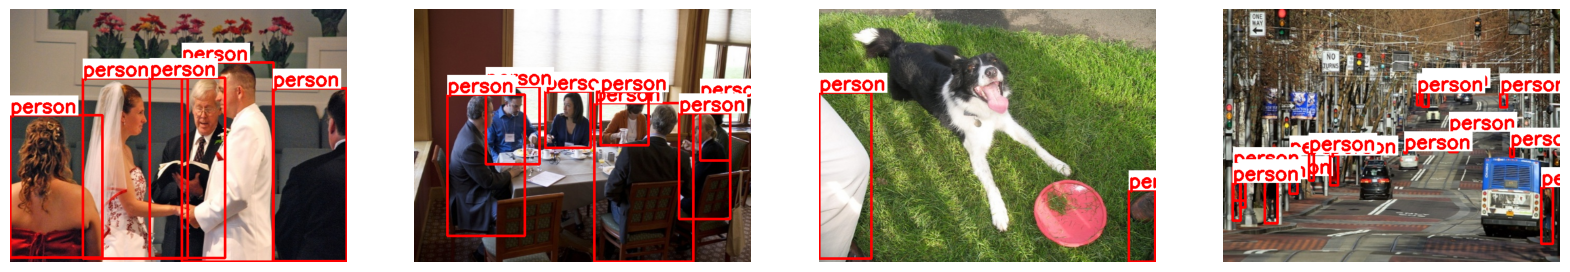

In [36]:
# Specifying the paths to the train and valid sets
train_set2 = "/content/Person Detection/combined_dataset/train"
valid_set2 = "/content/Person Detection/combined_dataset/valid"

# Create data generators for train and valid sets
train_data_gen2 = DataGenerator2(train_set2, batch_size=4)  # Reduces batch size for memory efficiency
valid_data_gen2 = DataGenerator2(valid_set2, batch_size=4)  # Reduces batch size for memory efficiency

# Visualize a batch of train images with bounding boxes
try:
    train_images_batch2, train_bboxes_batch2 = next(train_data_gen2)
    visualize_batch2(train_images_batch2, train_bboxes_batch2)
except Exception as e:
    print("Error:", e)

# Visualize a batch of valid images with bounding boxes
try:
    valid_images_batch2, valid_bboxes_batch2 = next(valid_data_gen2)
    visualize_batch2(valid_images_batch2, valid_bboxes_batch2)
except Exception as e:
    print("Error:", e)


# COCO_dataset_Person_Detection

In [ ]:
!unzip "/content/drive/MyDrive/Person Detection/coco_just_person_yolo (2).zip"  -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000080659.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000080671.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000080932.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000081394.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000081594.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000081738.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000081988.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000082085.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/images/000000082688.jpg  
  inflating: /content/coco_just_person_yolo (2)/cocodataset/validation/image

In [ ]:
# Specifying the paths to the image directories and labels
train_images1 = list(paths.list_images("/content/coco_just_person_yolo (2)/cocodataset/train/images"))
valid_images1= list(paths.list_images("/content/coco_just_person_yolo (2)/cocodataset/validation/images"))
train_labels1 = "/content/coco_just_person_yolo (2)/cocodataset/train/labels"
valid_labels1 = "/content/coco_just_person_yolo (2)/cocodataset/validation/labels"

In [ ]:
train_images = '/content/coco_just_person_yolo (2)/cocodataset/train/images'
train_labels = '/content/coco_just_person_yolo (2)/cocodataset/train/labels'
valid_images = '/content/coco_just_person_yolo (2)/cocodataset/validation/images'
valid_labels = '/content/coco_just_person_yolo (2)/cocodataset/validation/labels'

In [ ]:
Count_total_train_images = len(os.listdir(train_images))
Count_total_train_labels = len(os.listdir(train_labels))
print(Count_total_train_images)
print(Count_total_train_labels)

32058
64115


In [ ]:
Count_total_valid_images = len(os.listdir(valid_images))
Count_total_valid_labels = len(os.listdir(valid_labels))
print(Count_total_valid_images)
print(Count_total_valid_labels)

2693
2693


In [ ]:
import random


class DataGenerator:
    def __init__(self, image_directory, labels_directory, batch_size=32):
        self.image_directory = image_directory
        self.labels_directory = labels_directory
        self.batch_size = batch_size
        self.image_files = [filename for filename in os.listdir(image_directory) if filename.endswith('.jpg')]
        random.shuffle(self.image_files)
        self.current_idx = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_idx >= len(self.image_files):
            raise StopIteration
        batch_files = self.image_files[self.current_idx:self.current_idx + self.batch_size]
        images, bboxes_list = [], []
        for filename in batch_files:
            image_path = os.path.join(self.image_directory, filename)
            image = cv2.imread(image_path)
            images.append(image)

            bounding_boxes = read_bounding_boxes_from_labels(image_path, self.labels_directory)
            bboxes_list.append(bounding_boxes)

        self.current_idx += self.batch_size
        return images, bboxes_list

In [ ]:
def read_bounding_boxes_from_labels(image_path, labels_directory):
    # Extracting image file name without extension
    image_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Reading the corresponding label file
    label_path = os.path.join(labels_directory, image_filename + '.txt')

    # Initializing the list to store bounding boxes
    bounding_boxes = []

    with open(label_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            # Splitting the line into class ID and bounding box coordinates
            class_id, x, y, w, h = map(float, line.strip().split())

            # Converting the relative coordinates to absolute coordinates
            image = cv2.imread(image_path)
            image_height, image_width, _ = image.shape
            absolute_x = int((x - w / 2) * image_width)
            absolute_y = int((y - h / 2) * image_height)
            absolute_w = int(w * image_width)
            absolute_h = int(h * image_height)

            # Appending the bounding box coordinates to the list
            bounding_boxes.append([absolute_x, absolute_y, absolute_w, absolute_h])

    return bounding_boxes

In [ ]:
def draw_bounding_boxes(image, bounding_boxes):
    for bbox in bounding_boxes:
        x, y, w, h = bbox
        color = (0, 0, 255)  # Red color
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        text = "person"
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
        cv2.rectangle(image, (x, y - text_size[1] - 5), (x + text_size[0], y), color, -1)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return image

In [ ]:
def visualize_batch(images, bboxes_list, ncols=4):
    nrows = (len(images) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
    for i, (image, bboxes) in enumerate(zip(images, bboxes_list)):
        if nrows == 1:
            ax = axs[i % ncols]
        else:
            ax = axs[i // ncols, i % ncols]

        if image is not None:
            image_with_boxes = draw_bounding_boxes(image.copy(), bboxes)
            ax.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
            ax.axis('off')
        else:
            print(f"Error loading image at index {i}.")

    plt.show()

Error: 'NoneType' object has no attribute 'shape'


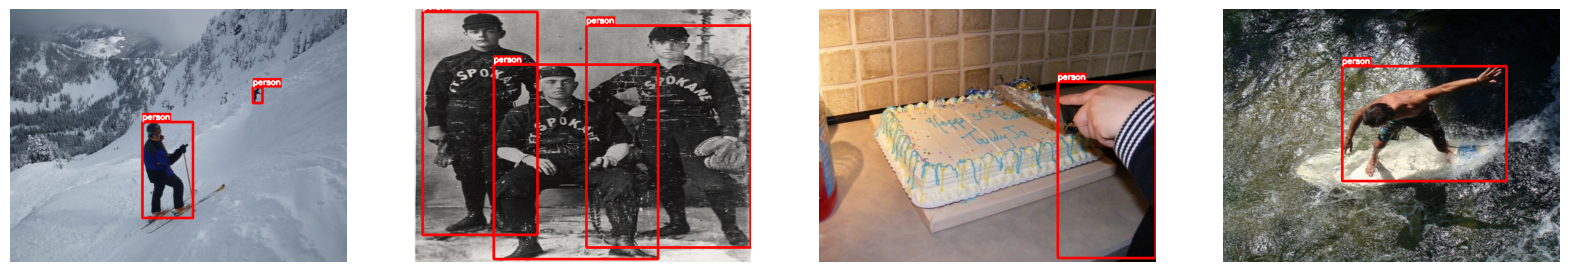

In [ ]:
# Specifying the paths to the train and valid sets
train_images = '/content/coco_just_person_yolo (2)/cocodataset/train/images'
train_labels = '/content/coco_just_person_yolo (2)/cocodataset/train/labels'
valid_images = '/content/coco_just_person_yolo (2)/cocodataset/validation/images'
valid_labels = '/content/coco_just_person_yolo (2)/cocodataset/validation/labels'

# Create data generators for train and valid sets
train_data_gen = DataGenerator(train_images, train_labels, batch_size=4)  # Reduce batch size for memory efficiency
valid_data_gen = DataGenerator(valid_images, valid_labels, batch_size=4)  # Reduce batch size for memory efficiency

# Visualize a batch of train images with bounding boxes
try:
    train_images_batch, train_bboxes_batch = next(train_data_gen)
    visualize_batch(train_images_batch, train_bboxes_batch)
except Exception as e:
    print("Error:", e)

# Visualize a batch of valid images with bounding boxes
try:
    valid_images_batch, valid_bboxes_batch = next(valid_data_gen)
    visualize_batch(valid_images_batch, valid_bboxes_batch)
except Exception as e:
    print("Error:", e)


# Open_images_labels


In [ ]:
!unzip "/content/drive/MyDrive/Person Detection/open_images_labels.zip"  -d "/content"

Streaming output truncated to the last 5000 lines.
 extracting: /content/open_images/yolo_labels/ff28e1499330ca60.txt  
 extracting: /content/open_images/yolo_labels/ff28e37239443c71.txt  
 extracting: /content/open_images/yolo_labels/ff28e9cd6d211698.txt  
 extracting: /content/open_images/yolo_labels/ff28ef76cd2c5ea3.txt  
 extracting: /content/open_images/yolo_labels/ff28f8b83aec3f5c.txt  
 extracting: /content/open_images/yolo_labels/ff29064b786a8ea3.txt  
 extracting: /content/open_images/yolo_labels/ff290bd6c8d3b8ba.txt  
 extracting: /content/open_images/yolo_labels/ff29274bc80c6f81.txt  
 extracting: /content/open_images/yolo_labels/ff2931c7a5b529a4.txt  
  inflating: /content/open_images/yolo_labels/ff293475dc74ae2d.txt  
 extracting: /content/open_images/yolo_labels/ff293d093b68f540.txt  
 extracting: /content/open_images/yolo_labels/ff295b45ff06f219.txt  
 extracting: /content/open_images/yolo_labels/ff296cab8193e004.txt  
 extracting: /content/open_images/yolo_labels/ff296f

# Open_images_data

In [ ]:
!unzip "/content/drive/MyDrive/Person Detection/open_images_data-resized.zip"  -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data-resized/7eac701478fceb73.jpg  
  inflating: /content/data-resized/7eacb8f9016f5005.jpg  
  inflating: /content/data-resized/7eacc487a6e4d3b1.jpg  
  inflating: /content/data-resized/7ead257a0606b4ba.jpg  
  inflating: /content/data-resized/7eada1f2cf3d0d18.jpg  
  inflating: /content/data-resized/7eae0a75ac087515.jpg  
  inflating: /content/data-resized/7eae17b886bc4861.jpg  
  inflating: /content/data-resized/7eae20074c2186ed.jpg  
  inflating: /content/data-resized/7eae99796b746eb1.jpg  
  inflating: /content/data-resized/7eae9eacb7ecece6.jpg  
  inflating: /content/data-resized/7eae9f26743c397d.jpg  
  inflating: /content/data-resized/7eaec482b0f6f6a2.jpg  
  inflating: /content/data-resized/7eaf47d72e3560f8.jpg  
  inflating: /content/data-resized/7eaf7c9ccc07d00f.jpg  
  inflating: /content/data-resized/7eb04a04b1d10bc4.jpg  
  inflating: /content/data-resized/7eb050479d1315fc.jpg  
  inflating: /content

In [ ]:
open_images = '/content/data-resized'
open_labels = '/content/open_images/yolo_labels'


In [ ]:
Count_total_open_images = len(os.listdir(open_images))
Count_total_open_labels = len(os.listdir(open_labels))
print(Count_total_open_images)
print(Count_total_open_labels)

129158
1743042


In [ ]:
import random
class DataGenerator1:
    def __init__(self, image_directory1, labels_directory1, batch_size1=32):
        self.image_directory1 = image_directory1
        self.labels_directory1 = labels_directory1
        self.batch_size1 = batch_size1
        self.image_files1 = [filename for filename in os.listdir(image_directory1) if filename.endswith('.jpg')]
        random.shuffle(self.image_files1)
        self.current_idx1 = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_idx1 >= len(self.image_files1):
            raise StopIteration
        batch_files1 = self.image_files1[self.current_idx1:self.current_idx1 + self.batch_size1]
        images1, bboxes_list1 = [], []
        for filename1 in batch_files1:
            image_path1 = os.path.join(self.image_directory1, filename1)
            image1 = cv2.imread(image_path1)
            images1.append(image1)

            bounding_boxes1 = read_bounding_boxes_from_labels1(image_path1, self.labels_directory1)
            bboxes_list1.append(bounding_boxes1)

        self.current_idx1 += self.batch_size1
        return images1, bboxes_list1


In [ ]:
import os
import cv2

def read_bounding_boxes_from_labels1(image_path1, labels_directory1):
    # Extracting image file name without extension
    image_filename1 = os.path.splitext(os.path.basename(image_path1))[0]

    # Reading the corresponding label file
    label_path1 = os.path.join(labels_directory1, image_filename1 + '.txt')

    # Initializing the list to store bounding boxes
    bounding_boxes1 = []

    with open(label_path1, 'r') as file1:
        lines1 = file1.readlines()

        for line1 in lines1:
            # Splitting the line into class ID and bounding box coordinates
            class_id1, x1, y1, w1, h1 = map(float, line1.strip().split())

            # Converting the relative coordinates to absolute coordinates
            image1 = cv2.imread(image_path1)
            image_height1, image_width1, _ = image1.shape
            absolute_x1 = int((x1 - w1 / 2) * image_width1)
            absolute_y1 = int((y1 - h1 / 2) * image_height1)
            absolute_w1 = int(w1 * image_width1)
            absolute_h1 = int(h1 * image_height1)

            # Appending the bounding box coordinates to the list
            bounding_boxes1.append([absolute_x1, absolute_y1, absolute_w1, absolute_h1])

    return bounding_boxes1


In [ ]:
import cv2

def draw_bounding_boxes1(image1, bounding_boxes1):
    for bbox1 in bounding_boxes1:
        x1, y1, w1, h1 = bbox1
        color1 = (0, 0, 255)  # Red color
        cv2.rectangle(image1, (x1, y1), (x1 + w1, y1 + h1), color1, 3)
        text1 = "person"
        text_size1 = cv2.getTextSize(text1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
        cv2.rectangle(image1, (x1, y1 - text_size1[1] - 5), (x1 + text_size1[0], y1), color1, -1)
        cv2.putText(image1, text1, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return image1


In [ ]:
import cv2
import matplotlib.pyplot as plt

def visualize_batch1(images1, bboxes_list1, ncols1=4):
    nrows1 = (len(images1) + ncols1 - 1) // ncols1
    fig1, axs1 = plt.subplots(nrows1, ncols1, figsize=(20, 5 * nrows1))
    for i1, (image1, bboxes1) in enumerate(zip(images1, bboxes_list1)):
        if nrows1 == 1:
            ax1 = axs1[i1 % ncols1]
        else:
            ax1 = axs1[i1 // ncols1, i1 % ncols1]

        if image1 is not None:
            image_with_boxes1 = draw_bounding_boxes1(image1.copy(), bboxes1)
            ax1.imshow(cv2.cvtColor(image_with_boxes1, cv2.COLOR_BGR2RGB))
            ax1.axis('off')
        else:
            print(f"Error loading image at index {i1}.")

    plt.show()


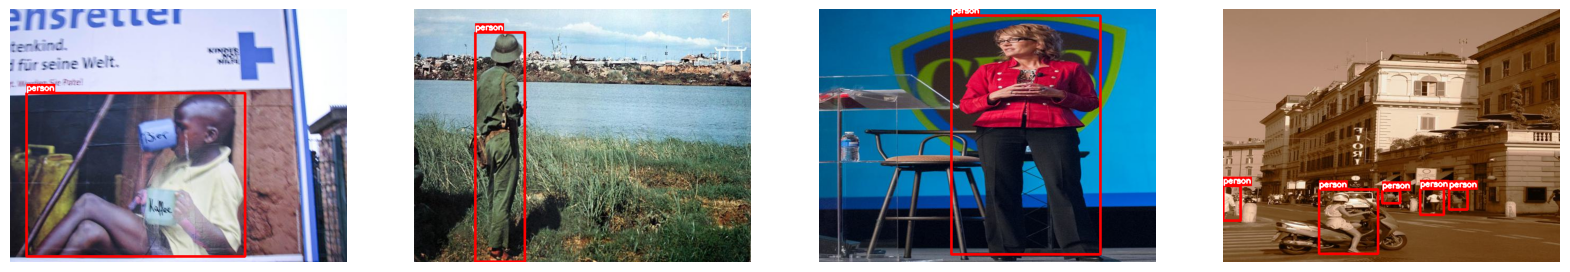

In [ ]:
# Specifying the paths to the train and valid sets
open_images = '/content/data-resized'
open_labels = '/content/open_images/yolo_labels'


# Create data generators for open images and labels
open_data_gen1 = DataGenerator1(open_images, open_labels, batch_size1=4)  # Reduce batch size for memory efficiency

# Visualize a batch of train images with bounding boxes
try:
    open_images_batch1, open_bboxes_batch1 = next(open_data_gen1)
    visualize_batch1(open_images_batch1, open_bboxes_batch1)
except Exception as e1:
    print("Error:", e1)


